In [1]:
import cv2
import matplotlib.pyplot as plt
from math import ceil

In [2]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],
               [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

In [3]:
import pandas as pd

In [6]:
df = pd.read_csv('../dataframes/br.csv')

In [7]:
df.head()

,video_name,true_label,path_to_video,path_to_img,0,1,2,3,4,5,...,16,17,18,19,20,21,22,23,24,sub_class
0,03b8033d6d547574.mp4,no_action,../prepair_dataset/train/no_action/03b8033d6d5...,../images_for_emb/no_action/03b8033d6d547574.jpg,-1.448875,7.587995,0.356033,-2.017793,-3.558548,-0.230762,...,-0.589942,0.055014,-0.523741,-0.202243,-0.114275,0.133338,-0.020403,-0.011311,-0.048076,0
1,060fb2db9c860b66.mp4,no_action,../prepair_dataset/train/no_action/060fb2db9c8...,../images_for_emb/no_action/060fb2db9c860b66.jpg,10.105332,-1.655266,-0.237262,0.590111,-0.410391,-0.230808,...,-0.947272,0.388757,-1.684762,-1.432333,1.375770,1.097853,-1.428208,-0.318122,0.454472,1
2,0f4c86beb84b2eca.mp4,no_action,../prepair_dataset/train/no_action/0f4c86beb84...,../images_for_emb/no_action/0f4c86beb84b2eca.jpg,-0.136421,3.495630,-4.016883,-2.348485,4.096376,4.656129,...,-0.250970,0.368721,-0.705795,-0.781684,-1.435449,0.431068,-0.188254,0.259026,0.056968,2
3,1dd6bf94517609eb.mp4,no_action,../prepair_dataset/train/no_action/1dd6bf94517...,../images_for_emb/no_action/1dd6bf94517609eb.jpg,-5.174220,-1.885305,-5.181727,-1.396580,-0.624434,-1.995057,...,0.994035,-0.550582,0.389919,0.421666,0.097622,0.051219,-0.696778,1.069123,-0.144685,3
4,1df2cff51066ac34.mp4,no_action,../prepair_dataset/train/no_action/1df2cff5106...,../images_for_emb/no_action/1df2cff51066ac34.jpg,-3.948862,-3.049152,6.197106,-0.865958,0.596726,-1.143777,...,-1.316681,-1.114278,-1.412906,1.605969,-0.467179,-0.683005,-0.585643,0.038377,0.194689,4


In [8]:
df.iloc[:, 4:-1].head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.448875,7.587995,0.356033,-2.017793,-3.558548,-0.230762,1.807611,-0.094712,-0.285378,0.243625,...,0.890538,-0.589942,0.055014,-0.523741,-0.202243,-0.114275,0.133338,-0.020403,-0.011311,-0.048076
1,10.105332,-1.655266,-0.237262,0.590111,-0.410391,-0.230808,0.613697,1.940164,-2.090696,-2.037068,...,-1.851414,-0.947272,0.388757,-1.684762,-1.432333,1.375770,1.097853,-1.428208,-0.318122,0.454472
2,-0.136421,3.495630,-4.016883,-2.348485,4.096376,4.656129,-3.159360,-0.034144,1.720233,-1.728190,...,-0.185277,-0.250970,0.368721,-0.705795,-0.781684,-1.435449,0.431068,-0.188254,0.259026,0.056968
3,-5.174220,-1.885305,-5.181727,-1.396580,-0.624434,-1.995057,-0.718539,-0.720986,-2.473870,-1.843732,...,-0.241520,0.994035,-0.550582,0.389919,0.421666,0.097622,0.051219,-0.696778,1.069123,-0.144685
4,-3.948862,-3.049152,6.197106,-0.865958,0.596726,-1.143777,-1.112046,-1.014697,0.242457,-1.554017,...,-1.096461,-1.316681,-1.114278,-1.412906,1.605969,-0.467179,-0.683005,-0.585643,0.038377,0.194689


In [21]:
clustering = DBSCAN(eps=10, min_samples=2).fit_predict(df.iloc[:, 4:-1])
clustering

array([ 0,  1,  2,  3,  4,  0,  3,  5,  4, -1,  4,  0,  3, -1,  3,  3,  3,
       -1,  3,  6,  3,  4,  5,  1,  2,  3,  3,  4,  4,  6,  3,  0,  3,  3,
        0,  0,  4, -1,  3,  2,  4,  4,  4,  3,  3,  3, -1, -1,  0],
      dtype=int64)

In [20]:
len(clustering)

49

In [16]:
def plot_subclasses(df):
    """Функция для визуального анализа качества разбиения изображений на подклассы"""

    for sub_class in df['cluster'].unique():
        temp_df = df[df['cluster'] == sub_class]
        count_rows = ceil(len(temp_df) / 5)
        fig = plt.figure(figsize=(12, count_rows * 2))

        for i, name in enumerate(temp_df['path_to_img']):
            frame = cv2.imread(name)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            fig.add_subplot(count_rows, 5, i + 1).set_title(f"sub_class: {sub_class}", size=9)
            plt.imshow(frame)
            plt.axis('off')

        plt.show()

In [22]:
df['cluster'] = clustering

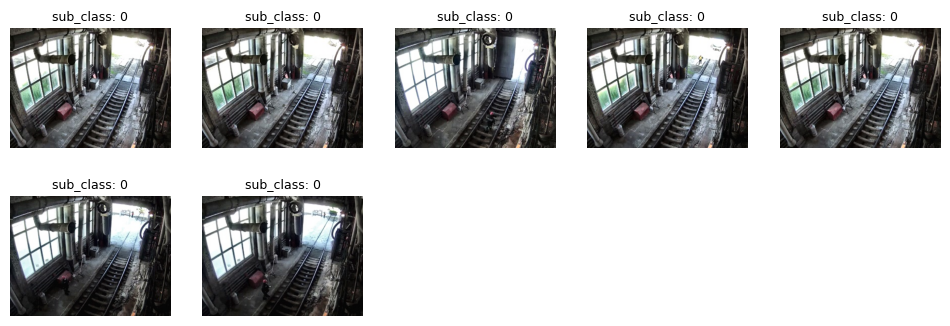

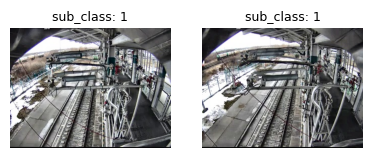

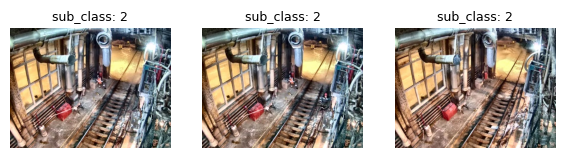

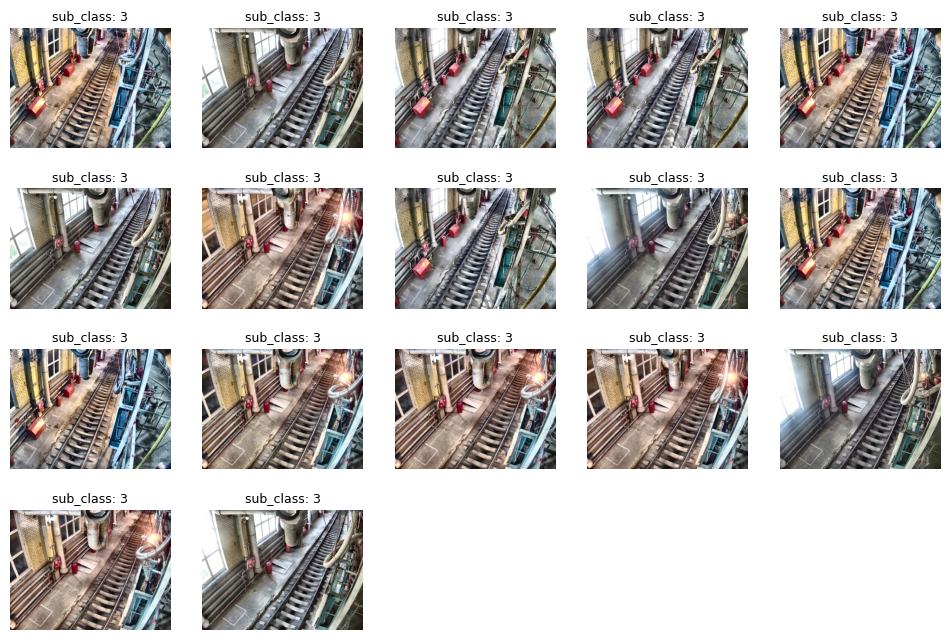

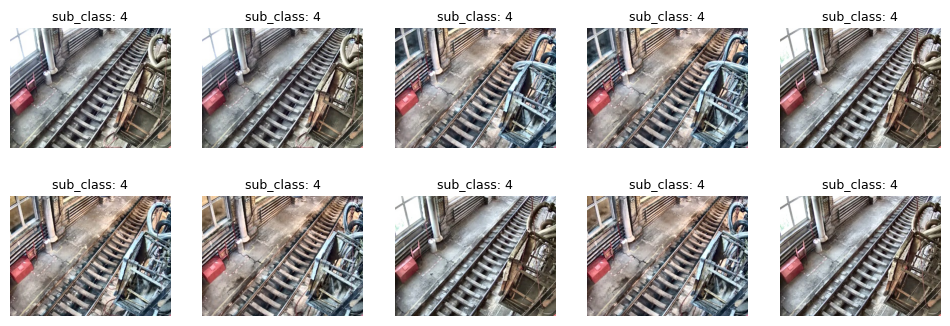

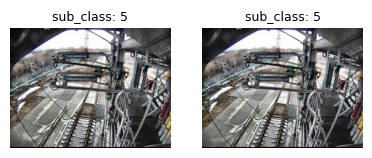

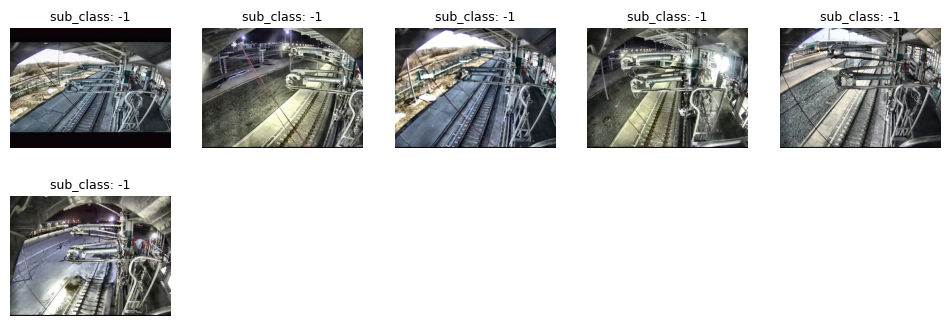

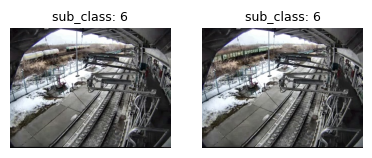

In [23]:
plot_subclasses(df)